Libraries installation 

Importing the libraries 


In [1]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import tweepy as tw
import datetime
from tweepy import api
import nltk 
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from textblob import TextBlob
nltk.download('wordnet')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.classifier import PrecisionRecallCurve
import tweepy
from tweepy.auth import OAuthHandler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import TweetTokenizer
import warnings
warnings.filterwarnings("ignore")
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
from gensim import corpora, models
from scipy.linalg.decomp_svd import null_space


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
def inputacco():
  input_string = input("Enter accounts separated by comma ")
  search_query = input_string.split(",")
  return search_query

In [3]:
def input_date():
  date_entry = input('Enter a date in YYYY-MM-DD format')
  year, month, day = map(int, date_entry.split('-'))
  date1 = datetime.date(year, month, day)
  return date1

In [4]:
def notweets():
  no_of_tweeets= int(input("how many tweets u want  "))
  return no_of_tweeets

In [5]:
def Gettweets(search_query,date1,no_of_tweeets):  
  my_api_key = "OamGj76eUVRKmEE6yndJ7ph6o"
  my_api_secret = "BML9uzcPamD7pOS4fcZymnYS9rFwMfu1KZW9iIXzaD7cpSdSTs"

  # authenticate
  auth = tw.OAuthHandler(my_api_key, my_api_secret)
  api = tw.API(auth, wait_on_rate_limit=True)

  global tweets_copy 
  tweets_copy = []
  for  i in range(0,len(search_query)):
    tweets = tw.Cursor(api.search,
                q=search_query[i],
                lang="en",
                since=date1).items(no_of_tweeets)
    for tweet in tweets:
      tweets_copy.append(tweet)    
  print("Total Tweets fetched:", len(tweets_copy))
  tweets_df= pd.DataFrame() 

# populate the dataframe
  for tweet in tweets_copy:
      hashtags = []
      try:
          for hashtag in tweet.entities["hashtags"]:
              hashtags.append(hashtag["text"])
          text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
      except:
          pass
      tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                                'user_location': tweet.user.location,\
                                                'user_description': tweet.user.description,
                                                'user_verified': tweet.user.verified,
                                                'date': tweet.created_at,
                                                'text': text, 
                                                'original':text,
                                                'hashtags': [hashtags if hashtags else None],
                                                'source': tweet.source}))
      tweets_df = tweets_df.reset_index(drop=True)
      tweets_df.to_csv("data.csv")
  return tweets_df

Data preprocessing


In [6]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [7]:
def remove_username(text):
    Tweet = re.sub(r"user", '', text)
    Tweet = re.sub('@[^\s]+',' ',text)
    #return cleaned_string
    return Tweet

In [8]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

In [9]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [10]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [11]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

In [12]:

def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

In [13]:
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

In [14]:
st = stopwords.words('english')
st.append("and")
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:

exclude = set(string.punctuation)


def clean2(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized

In [16]:
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [17]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)  
    return test_punc_st_removed

In [18]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [19]:
def cleaning(df,review):
    print("****    Cleaning in Process  ***** ")
    time.sleep(5)
    df[review] = df[review].apply(clean2)
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].apply(remove_URL)
    df[review] = df[review].apply(remove_html)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(remove_username)
    df[review] = df[review].apply(Stemming)
    df[review] = df[review].apply(message_cleaning)

**CLassifiying** tweets 

In [20]:
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

In [21]:
def getanalytics(score):
  if score<0:
    return 'negative'

  elif score==0:    

    return 'neutral' 
  else :
    return 'positive'   



In [22]:
def labelenc(tweets_df):
  label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
  tweets_df['label']= label_encoder.fit_transform(tweets_df['analysis'])
  tweets_df['label'].unique()
  


In [23]:
def printnegative_tweets(tweets_df):
  j=1
  sortedDF=tweets_df.sort_values(by='Polarity')
  for i in range(0,sortedDF.shape[0]):
    if(sortedDF['analysis'][i]=='negative'):
      print(str(j)+ ') '+sortedDF['original'][i])
      print()
      j=j+1

In [24]:
def printpositive_tweets(tweets_df):
  j=1
  sortedDF=tweets_df.sort_values(by='Polarity')
  for i in range(0,sortedDF.shape[0]):
    if(sortedDF['analysis'][i]=='positive'):
      print(str(j)+ ') '+sortedDF['original'][i])
      print()
      j=j+1

Data visualization 

In [46]:
def Polarityandsubjectivityplot(tweets_df):
  plt.figure(figsize=(8,6))
  for i in range(0,tweets_df.shape[0]):
    plt.scatter(tweets_df['Polarity'][i],tweets_df['Subjectivity'][i],color='Blue')
  plt.title('sentiment analysis')
  plt.xlabel('polarity')
  plt.ylabel('subjectiivity')
  plt.show()

In [26]:
def wordcloudoverall(tweets_df):
  txt = ' '.join(rev for rev in tweets_df.text)
  plt.figure(figsize=(15,8))

  wordcloud = WordCloud(
              background_color = 'black',
              max_font_size = 100,
              max_words = 100,
              width = 1000,
              height = 600
              ).generate(txt)


  plt.imshow(wordcloud,interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

In [27]:
def wordcloudp(ptweets):
  txt = ' '.join(rev for rev in ptweets)
  plt.figure(figsize=(15,8))

  wordcloud = WordCloud(
              background_color = 'black',
              max_font_size = 100,
              max_words = 100,
              width = 1000,
              height = 600
              ).generate(txt)


  plt.imshow(wordcloud,interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

In [28]:
def wordcloudn(ntweets):
  txt = ' '.join(rev for rev in ntweets)
  plt.figure(figsize=(15,8))

  wordcloud = WordCloud(
              background_color = 'black',
              max_font_size = 100,
              max_words = 100,
              width = 1000,
              height = 600
              ).generate(txt)


  plt.imshow(wordcloud,interpolation = 'bilinear')
  plt.axis('off')
  plt.show()


In [29]:
def showgraphnooftweets(tweets_df):
  temp = tweets_df.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
  temp.style.background_gradient(cmap='Purples')
  print(temp)
  sns.set_theme(style='whitegrid')
  sns.set(rc = {'figure.figsize':(13,8)})
  sns.set_palette("pastel")
  sns.countplot(x='label',data=tweets_df)
  plt.show()

In [30]:
def histofnumwordtweet(tweets_df):
  df_vis = tweets_df.copy()
  df_vis['Num_word_tweet'] = df_vis['text'].apply(lambda x:len(str(x).split()))
  sns.histplot(data=df_vis, x="Num_word_tweet",bins=30,color='green')
  plt.show()

In [31]:
def average_word_length(tweets_df):
  fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
  word=tweets_df[tweets_df['label']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
  ax1.set_title('Negative Tweets')
  word=tweets_df[tweets_df['label']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
  ax2.set_title('Neutral  Tweets')
  word=tweets_df[tweets_df['label']==2]['text'].str.split().apply(lambda x : [len(i) for i in x])
  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='red')
  ax3.set_title('Positive  Tweets')
  fig.suptitle('Average word length in each tweet')
  plt.show()

In [32]:
def common_word_count(df_vis):
  df_vis['temp_list'] = df_vis['text'].apply(lambda x:str(x).split())
  top = Counter([item for sublist in df_vis['temp_list'] for item in sublist])
  temp = pd.DataFrame(top.most_common(20))
  temp.columns = ['Common_words','count']
  temp.style.background_gradient(cmap='Blues')
  return temp
  

Modeling


In [33]:
def graphsacc(func,model,X_train_count,X_test_count,y_train,y_test):
  viz = PrecisionRecallCurve(func(),
                            classes=model.classes_,   # label ların isimleri ile gözükmesi için yoksa 0,1,2 gözükür 
                            per_class=True,  # bütün class lar grafikte gözüksün diye True yaptık.
                            cmap="Set1")
  viz.fit(X_train_count,y_train)
  viz.score(X_test_count, y_test)  # test datası üzerinden skorları alıyoruz
  viz.show();

In [34]:
def all_models(func,diction,X_train_count,X_test_count,y_train,y_test):
  model = func()
  model.fit(X_train_count,y_train)
  model_pred = model.predict(X_test_count)
  model_train_pred = model.predict(X_train_count)
  diction.update({func():accuracy_score(y_test,model_pred) })

  
  
  return  model,model_pred,model_train_pred

In [35]:
def reports(model_pred,model_train_pred,y_test,y_train):
  print("X Test")
  print(classification_report(y_test,model_pred))
  print("X Train")
  print(classification_report(y_train,model_train_pred))
  plt.figure(figsize=(8,8))
  time.sleep(5)
  sns.heatmap(confusion_matrix(y_test,model_pred),annot = True,fmt = "d")
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

Part 2 LDA

In [36]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [37]:
def pr():
  print("\    /\    /  _       _   _         _        ")
  print(" \  /  \  /  |_  |   |   | |  |\/| |_        ")
  print("  \/    \/   |_  |_  |_  |_|  |  | |_        ")
  print()

main


In [44]:
import time
from tweepy.auth import OAuthHandler
from sklearn.ensemble import AdaBoostClassifier
 
def main():
  pr() 
  print(" *********************Enter information*************************")
 # try:
 #   search_query  = inputacco()
 # except Exception: 
 #   print("enter again")
 #   search_query  = inputacco() 
 # try:
 #   date1 = input_date()
 # except Exception: 
 #   print("enter again")
 #   date1 = input_date()
 # try:  
 #  no_of_tweeets= notweets() 
 # except Exception:
 #   print(" enter again")
 #   no_of_tweeets= notweets()

  #tweets_df=Gettweets(search_query,date1,no_of_tweeets)  
 # tweets_df.to_csv("data.csv")
  tweets_df=pd.read_csv("data.csv")
  
  cleaning(tweets_df,'text')
  print("*************Classifying Tweets************** ")
  tweets_df['Subjectivity']=tweets_df['text'].apply(getsubjectivity)
  tweets_df['Polarity']=tweets_df['text'].apply(getpolarity)
  tweets_df["analysis"]=tweets_df['Polarity'].apply(getanalytics)
  labelenc(tweets_df)
  data_text = tweets_df[['original']]
  data_text['index'] = data_text.index
  documents = data_text
  global diction
  diction={}
  global tw
  tw=tweets_df.copy()
  while(True):
    print("***********************************************************")
    print("***********************************************************") 
    print("*** \t1 .....Show Tweets                            ****")
    print("*** \t2 .....Show graphs                            ****")
    print("*** \t3 .....Model creation                         ****")
    print("*** \t4 .....Topic Modelling                        ****")
    print("*** \t5 .....Tweets sentiments using model created  ****")
    print("*** \t6 ..... Exit                                  ****")
    print("***********************************************************")
    print("***********************************************************")
    choice=int(input("Enter a choice      :::: "))
    if choice==1:
    
      print("***********************************************************")
      print("**       1 .  see all Tweets                             **")
      print("**       2 .  see all positive Tweets                    **")
      print("**       3 .  see all negative Tweets                    **")
      print("***********************************************************")
      choice2=int(input("Enter a choice of Tweets :::: "))
      if choice2==1:
        print(tweets_df)
      elif choice2 ==2:
        printpositive_tweets(tweets_df)
        ptweets=tweets_df[tweets_df.analysis == 'positive']
        ptweets=ptweets['original']
        ptweets.to_csv("data_positive.csv")
      elif choice2==3:
        printnegative_tweets(tweets_df)  
        ntweets=tweets_df[tweets_df.analysis == 'negative']
        ntweets=ntweets['original']
        ptweets.to_csv("data_negative.csv")



    elif choice ==2:
      while(True):
        print("__________________________________________________ ")
        print("|                                                 |")
        print("|    1 .  print wordcloud******                   |")
        print("|    2 .  print positive wordlcoud******          |")
        print("|    3 .  print  negative  wordcloud******        |")
        print("|    4 .  print  Subjectivity and polarity******  |")
        print("|    5 .  print  show graph of no tweets ******   |")
        print("|    6 .  print  no of tweets in a word ******    |")
        print("|    7 .  print  average word length              |")
        print("|    8 .  print common words                      |")
        print("|    9 .  Exit                                    |")
        print("|_________________________________________________|")
        print("--------------------------------------------------------")
        choice3=int(input("enter a choice of tweets "))
        if choice3==1:
          wordcloudoverall(tweets_df)
          time.sleep(3)
        elif choice3==2:  
          ptweets=tweets_df[tweets_df.analysis == 'positive']
          ptweets=ptweets['text']
          print(round(ptweets.shape[0]/tweets_df.shape[0]*100,1))
          wordcloudp(ptweets)
          time.sleep(5)
          print("  ")
        elif choice3==3:  
          ntweets=tweets_df[tweets_df.analysis == 'negative']
          ntweets=ntweets['text']
          round(ntweets.shape[0]/tweets_df.shape[0]*100,1)
          wordcloudn(ntweets)
          time.sleep(5)
          print("  ")
        elif choice3==4:
          Polarityandsubjectivityplot(tweets_df)
          time.sleep(5)
        elif choice3==5:
          showgraphnooftweets(tweets_df)
          time.sleep(10)
        elif choice3==6:
          histofnumwordtweet(tweets_df)
          time.sleep(5)
        elif choice3==7:
          average_word_length(tweets_df)
          time.sleep(5)
        elif choice3==8:
          text1=common_word_count(tweets_df)
          text1.style.background_gradient(cmap='Blues')
          return text1
          time.sleep(5)
        else:
          break

    elif choice==3:
      X = tweets_df["text"]
      y = tweets_df["label"]
      X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30,random_state= 42)
      vt = CountVectorizer(analyzer="word")
      X_train_count = vt.fit_transform(X_train) 
      X_test_count = vt.transform(X_test)
      while(True):
        print("__________________________________________________")
        print("|    1.  Multonmial Naive bayes                  |")
        print("|    2.  SVC                                     |")
        print("|    3.  KNN                                     |")
        print("|    4.  RAndom forest                           |")
        print("|    5.  Aadaboost                               |")
        print("|    6.  show accuracy of all                    |")
        print("|    7.  Boosting of Random forest               |")
        print("|    8.  Boosting of Multinomial naive bayes     |")
        print("|    9.  Exit                                    |")
        print("|________________________________________________|")
        choice4=int(input("enter a choice "))
        print("____________Applying algorithms_____________")
        time.sleep(2)
        if choice4==1:
          time.sleep(5)
          model,model_pred,model_train_pred=all_models(MultinomialNB,diction,X_train_count,X_test_count,y_train,y_test)
          reports(model_pred,model_train_pred,y_test,y_train)
          graphsacc(MultinomialNB,model,X_train_count,X_test_count,y_train,y_test)
          print(diction)
          time.sleep(10)
        elif choice4==2:      
          time.sleep(5)
          model,model_pred,model_train_pred=all_models(SVC,diction,X_train_count,X_test_count,y_train,y_test)
          reports(model_pred,model_train_pred,y_test,y_train)
          graphsacc(SVC,model,X_train_count,X_test_count,y_train,y_test)
          print(diction)
          time.sleep(10)
        elif choice4==3: 
          
          time.sleep(5)
          model,model_pred,model_train_pred=all_models(KNeighborsClassifier,diction,X_train_count,X_test_count,y_train,y_test)
          reports(model_pred,model_train_pred,y_test,y_train)
          graphsacc(KNeighborsClassifier,model,X_train_count,X_test_count,y_train,y_test)
          time.sleep(10)
        elif choice4==4:
          time.sleep(5)
          model,model_pred,model_train_pred=all_models(RandomForestClassifier,diction,X_train_count,X_test_count,y_train,y_test)
          reports(model_pred,model_train_pred,y_test,y_train)
          graphsacc(RandomForestClassifier,model,X_train_count,X_test_count,y_train,y_test)
          time.sleep(10)  
        elif choice4==5:  
          time.sleep(5)
          model,model_pred,model_train_pred=all_models(AdaBoostClassifier,diction,X_train_count,X_test_count,y_train,y_test)
          reports(model_pred,model_train_pred,y_test,y_train)
          graphsacc(AdaBoostClassifier,model,X_train_count,X_test_count,y_train,y_test)
          time.sleep(10)
        elif choice4==6 :
          print(diction)   
        elif choice4==7:
          clf=AdaBoostClassifier(base_estimator=RandomForestClassifier(),n_estimators=100)
          clf.fit(X_train_count,y_train)
          model_pred = clf.predict(X_test_count)
          model_train_pred = clf.predict(X_train_count)
          diction.update({"AdaBoostClassifier(base_estimator=RandomForestClassifier(),n_estimators=100)":accuracy_score(y_test,model_pred) })
          reports(model_pred,model_train_pred,y_test,y_train)

        elif choice4==8:  
          clf=AdaBoostClassifier(base_estimator=MultinomialNB(),n_estimators=100)
          clf.fit(X_train_count,y_train)
          model_pred = clf.predict(X_test_count)
          model_train_pred = clf.predict(X_train_count)
          diction.update({"adabooost Multinomial":accuracy_score(y_test,model_pred) })
          reports(model_pred,model_train_pred,y_test,y_train)
          
        else:
          break
    elif choice==4:
      data_text = tweets_df[['original']]
      data_text['index'] = data_text.index
      documents = data_text
      processed_docs = documents['original'].map(preprocess)
      dictionary = gensim.corpora.Dictionary(processed_docs)
      dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
      bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
      tfidf = models.TfidfModel(bow_corpus)
      corpus_tfidf = tfidf[bow_corpus]
      lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
      lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
      documents['topic_lda']=null_space
      documents['topic_lda_tf']=null_space
      row_count = len(documents.index) # Return number of rows
      row_count

      for i in range(0,row_count):
        bow_vector = dictionary.doc2bow(preprocess(documents['original'][i]))
        for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
          documents['topic_lda'][i]=lda_model.print_topic(index, 5)
          documents['topic_lda_tf'][i]=lda_model_tfidf.print_topic(index, 5)
          #print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))
          break      
      #tweets_df.index = documents.index    
      tweets_df[['Topic modelling LDA', 'Topic modeling lDA Tuning']] = documents[['topic_lda', 'topic_lda_tf']]
      tweets_df.to_csv("topic_modelling.csv")

    elif choice==5:
      print("WARNING: !! Train the model first")
      Keymax = max(zip(diction.values(), diction.keys()))[1]
      print(Keymax) 
      model = Keymax
      model.fit(X_train_count,y_train)
      model_pred = model.predict(X_test_count)
      model_train_pred = model.predict(X_train_count)

      print("the accuracy is ")
      print(accuracy_score(y_test,model_pred))   
      from csv import reader
      print("******************************************")
      sentence=input(" Enter a string")
      print("******************************************")
      global df2
      
      df2=pd.Series(sentence)
     
      X_1 = vt.transform(df2)
      print("*******************OUTPUT**********")
      print( model.predict(X_1))




    else:
      break
      











Streaming output truncated to the last 5000 lines.
Tax payers mon…

71) @OfficialDMRC But pl do run frequent msg on your PAS system for passengers to not play videos or songs on high volume while in Metro. Some passengers play very wierd and offensive videos/songs in metro and if you ask them to lower the sound or put on ear plugs, they start fighting with you

72) @OfficialDMRC   two persons carrying bakery items in metro coach, traveling from kashmiri gate metro station towards rajiv chowk at 9:45 am date 15 June, whether it is permissible as per rules or not. If not,  whether it was stopped by security staff
Is it goods train or passenge https://t.co/GleTBLA1iQ

73) @OfficialDMRC First fix blue line

74) RT @saviour_era: @OfficialDMRC 
Must ask their free communters to first pay ticket price to travel and then ask for seats. 

Tax payers mon…

75) @OfficialDMRC Personally i am disappointed as no immediate actiin was action. This has reduced trust of a valued customer and increased t

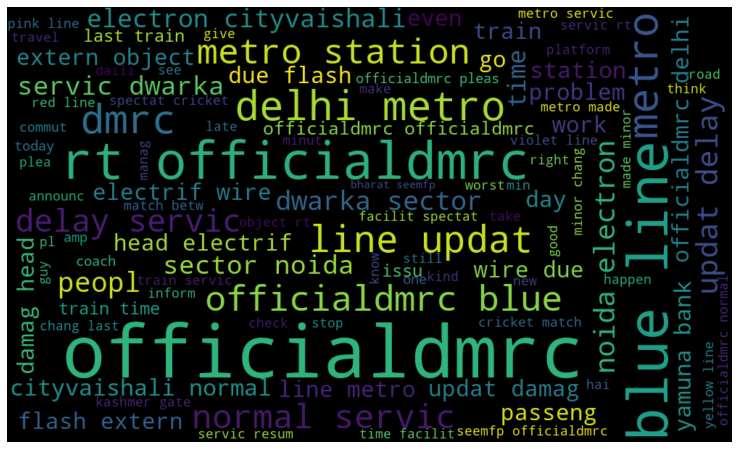

__________________________________________________ 
|                                                 |
|    1 .  print wordcloud******                   |
|    2 .  print positive wordlcoud******          |
|    3 .  print  negative  wordcloud******        |
|    4 .  print  Subjectivity and polarity******  |
|    5 .  print  show graph of no tweets ******   |
|    6 .  print  no of tweets in a word ******    |
|    7 .  print  average word length              |
|    8 .  print common words                      |
|    9 .  Exit                                    |
|_________________________________________________|
--------------------------------------------------------
enter a choice of tweets 2
30.0


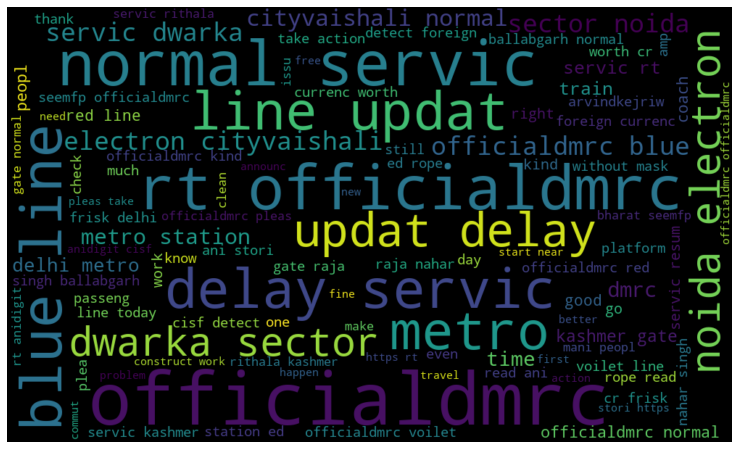

  
__________________________________________________ 
|                                                 |
|    1 .  print wordcloud******                   |
|    2 .  print positive wordlcoud******          |
|    3 .  print  negative  wordcloud******        |
|    4 .  print  Subjectivity and polarity******  |
|    5 .  print  show graph of no tweets ******   |
|    6 .  print  no of tweets in a word ******    |
|    7 .  print  average word length              |
|    8 .  print common words                      |
|    9 .  Exit                                    |
|_________________________________________________|
--------------------------------------------------------
enter a choice of tweets 3


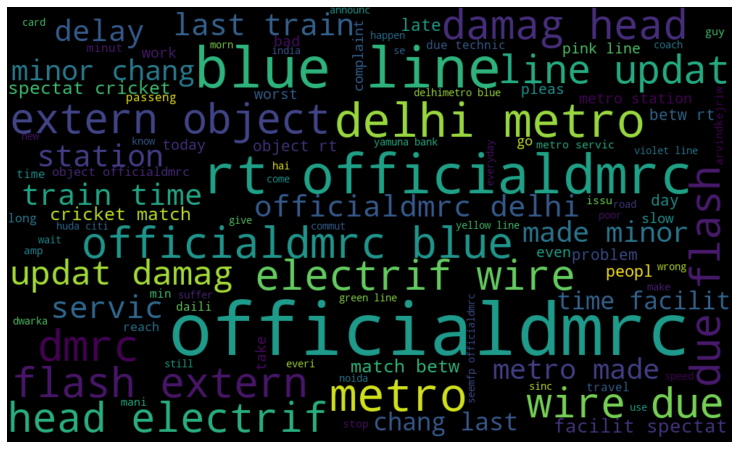

  
__________________________________________________ 
|                                                 |
|    1 .  print wordcloud******                   |
|    2 .  print positive wordlcoud******          |
|    3 .  print  negative  wordcloud******        |
|    4 .  print  Subjectivity and polarity******  |
|    5 .  print  show graph of no tweets ******   |
|    6 .  print  no of tweets in a word ******    |
|    7 .  print  average word length              |
|    8 .  print common words                      |
|    9 .  Exit                                    |
|_________________________________________________|
--------------------------------------------------------
enter a choice of tweets 9
***********************************************************
***********************************************************
*** 	1 .....Show Tweets                            ****
*** 	2 .....Show graphs                            ****
*** 	3 .....Model creation                         ****
*

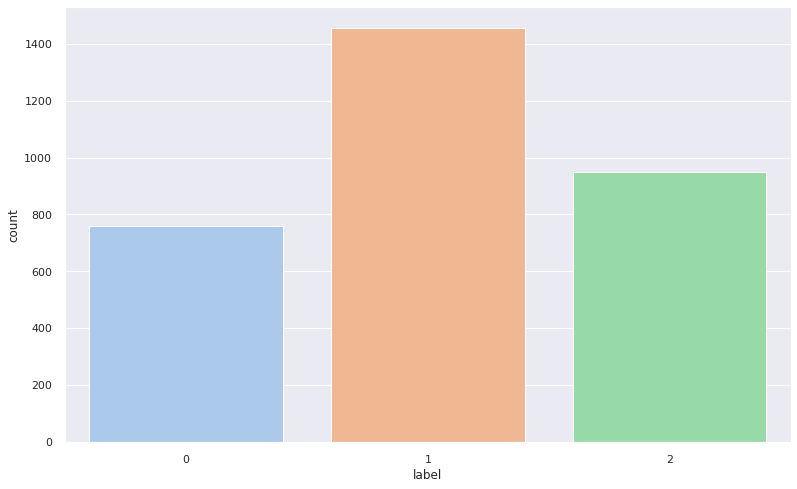

__________________________________________________ 
|                                                 |
|    1 .  print wordcloud******                   |
|    2 .  print positive wordlcoud******          |
|    3 .  print  negative  wordcloud******        |
|    4 .  print  Subjectivity and polarity******  |
|    5 .  print  show graph of no tweets ******   |
|    6 .  print  no of tweets in a word ******    |
|    7 .  print  average word length              |
|    8 .  print common words                      |
|    9 .  Exit                                    |
|_________________________________________________|
--------------------------------------------------------
enter a choice of tweets 6


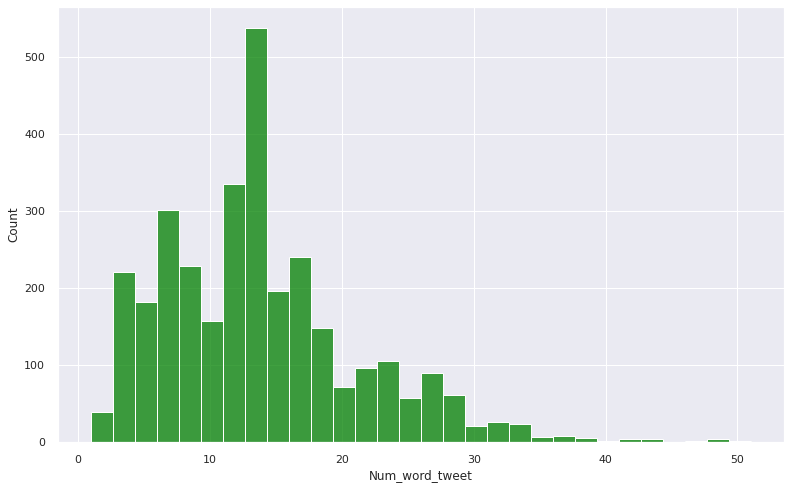

__________________________________________________ 
|                                                 |
|    1 .  print wordcloud******                   |
|    2 .  print positive wordlcoud******          |
|    3 .  print  negative  wordcloud******        |
|    4 .  print  Subjectivity and polarity******  |
|    5 .  print  show graph of no tweets ******   |
|    6 .  print  no of tweets in a word ******    |
|    7 .  print  average word length              |
|    8 .  print common words                      |
|    9 .  Exit                                    |
|_________________________________________________|
--------------------------------------------------------
enter a choice of tweets 7


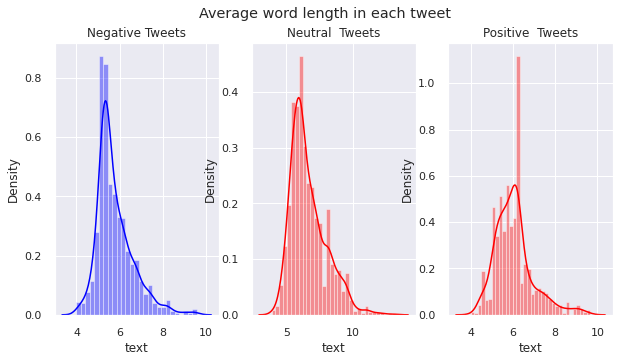

__________________________________________________ 
|                                                 |
|    1 .  print wordcloud******                   |
|    2 .  print positive wordlcoud******          |
|    3 .  print  negative  wordcloud******        |
|    4 .  print  Subjectivity and polarity******  |
|    5 .  print  show graph of no tweets ******   |
|    6 .  print  no of tweets in a word ******    |
|    7 .  print  average word length              |
|    8 .  print common words                      |
|    9 .  Exit                                    |
|_________________________________________________|
--------------------------------------------------------
enter a choice of tweets 9
***********************************************************
***********************************************************
*** 	1 .....Show Tweets                            ****
*** 	2 .....Show graphs                            ****
*** 	3 .....Model creation                         ****
*** 

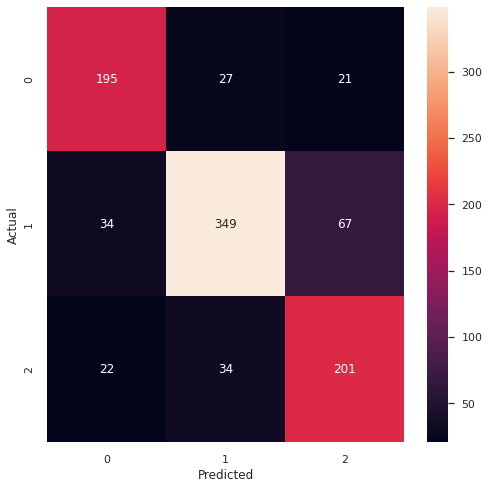

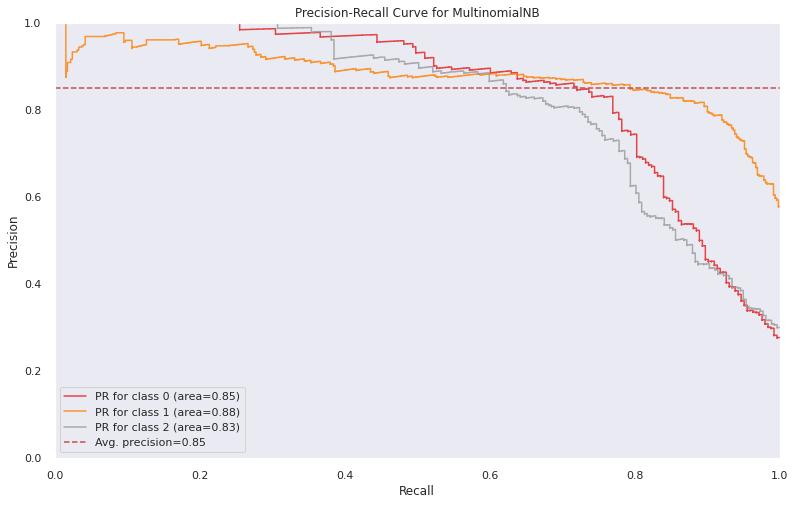

{MultinomialNB(): 0.7842105263157895}
__________________________________________________
|    1.  Multonmial Naive bayes                  |
|    2.  SVC                                     |
|    3.  KNN                                     |
|    4.  RAndom forest                           |
|    5.  Aadaboost                               |
|    6.  show accuracy of all                    |
|    7.  Boosting of Random forest               |
|    8.  Boosting of Multinomial naive bayes     |
|    9.  Exit                                    |
|________________________________________________|
enter a choice 4
____________Applying algorithms_____________
X Test
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       243
           1       0.85      1.00      0.92       450
           2       0.95      0.82      0.88       257

    accuracy                           0.90       950
   macro avg       0.92      0.87      0.89       950
weight

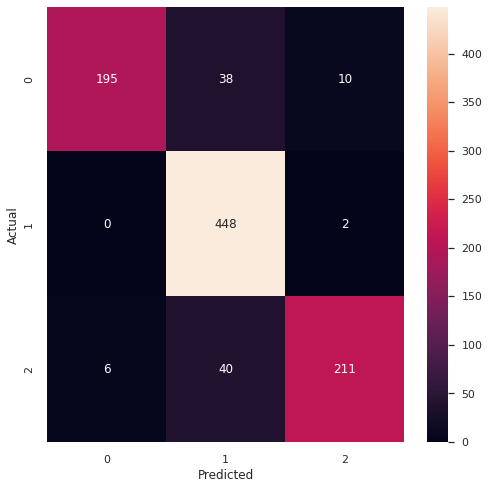

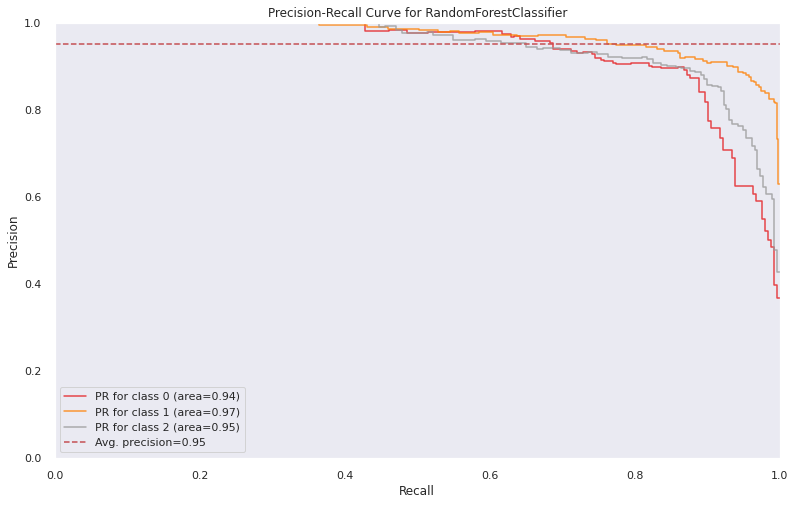

__________________________________________________
|    1.  Multonmial Naive bayes                  |
|    2.  SVC                                     |
|    3.  KNN                                     |
|    4.  RAndom forest                           |
|    5.  Aadaboost                               |
|    6.  show accuracy of all                    |
|    7.  Boosting of Random forest               |
|    8.  Boosting of Multinomial naive bayes     |
|    9.  Exit                                    |
|________________________________________________|
enter a choice 6
____________Applying algorithms_____________
{MultinomialNB(): 0.7842105263157895, RandomForestClassifier(): 0.8989473684210526}
__________________________________________________
|    1.  Multonmial Naive bayes                  |
|    2.  SVC                                     |
|    3.  KNN                                     |
|    4.  RAndom forest                           |
|    5.  Aadaboost                    

In [48]:
import tweepy
from tweepy.auth import OAuthHandler

main()